# Our goal is to analyze sales data.



> This project contains sales data of the Kmart company.
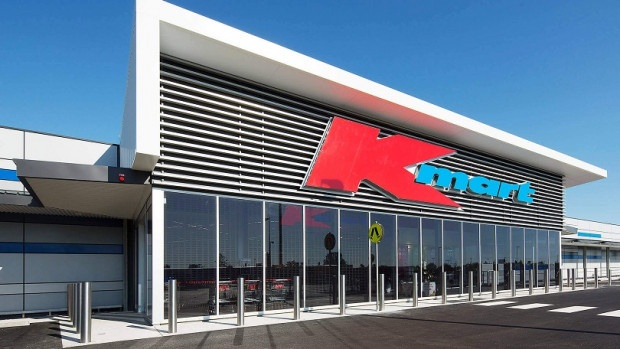



## Let's load the data and combine it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

data1 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_January_2019.csv')
data1["Month"]="January"

data2 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_February_2019.csv')
data2["Month"]="February"

data3 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_March_2019.csv')
data3["Month"]="March"

data4 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_April_2019.csv')
data4["Month"]="April"


data5 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_May_2019.csv')
data5["Month"]="May"


data6 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_June_2019.csv')
data6["Month"]="June"


data7 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_July_2019.csv')
data7["Month"]="July"

data8 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_August_2019.csv')
data8["Month"]="August"

data9 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_September_2019.csv')
data9["Month"]="September"

data10 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_October_2019.csv')
data10["Month"]="October"

data11 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_November_2019.csv')
data11["Month"]="November"

data12 = pd.read_csv('/content/drive/MyDrive/Veri Madenciliği/Sales_Data/Sales_December_2019.csv')
data12["Month"]="December"


FileNotFoundError: [Errno 2] File b'/content/drive/MyDrive/Veri Madencilig\xcc\x86i/Sales_Data/Sales_January_2019.csv' does not exist: b'/content/drive/MyDrive/Veri Madencilig\xcc\x86i/Sales_Data/Sales_January_2019.csv'

In [4]:
list = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12]
DataFrame=pd.concat(list)
DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December


In [5]:
0

0



> Let's collect to see the data containing nan.



In [6]:
DataFrame.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month                 0
dtype: int64



> Take out the nan contents and check.



In [7]:
DataFrame=DataFrame.dropna()
DataFrame.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64



> We have data with the same name as the title.



In [8]:
DataFrame[DataFrame['Quantity Ordered'] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,January
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,December




> Let's take them out.



In [9]:
DataFrame_filtered = DataFrame[DataFrame['Quantity Ordered'] != "Quantity Ordered"] 

## Best selling month and earnings.



> Let's multiply the order quantity by the unit price to reach the sale.



In [10]:
print(DataFrame_filtered["Quantity Ordered"].dtypes)
DataFrame_filtered["Quantity Ordered"]=DataFrame_filtered["Quantity Ordered"].astype("float")
print(DataFrame_filtered["Quantity Ordered"].dtypes)
DataFrame_filtered["Price Each"]=DataFrame_filtered["Price Each"].astype("float")
DataFrame_filtered["Sales"]=DataFrame_filtered["Quantity Ordered"]*DataFrame_filtered["Price Each"]

object
float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht



> Reaching the total sales per month.



In [11]:
DataFrame_sales=DataFrame_filtered.groupby(["Month"])['Sales'].sum().sort_values(ascending=False)
DataFrame_sales=DataFrame_sales.to_frame()
DataFrame_sales

,Sales
Month,
December,4.619297e+06
October,3.736884e+06
April,3.396059e+06
November,3.198909e+06
May,3.144585e+06
March,2.809063e+06
July,2.646900e+06
June,2.578293e+06
August,2.244412e+06


We can see that December is the month with the most earnings.



> Let's take a look at the monthly earnings graphic.



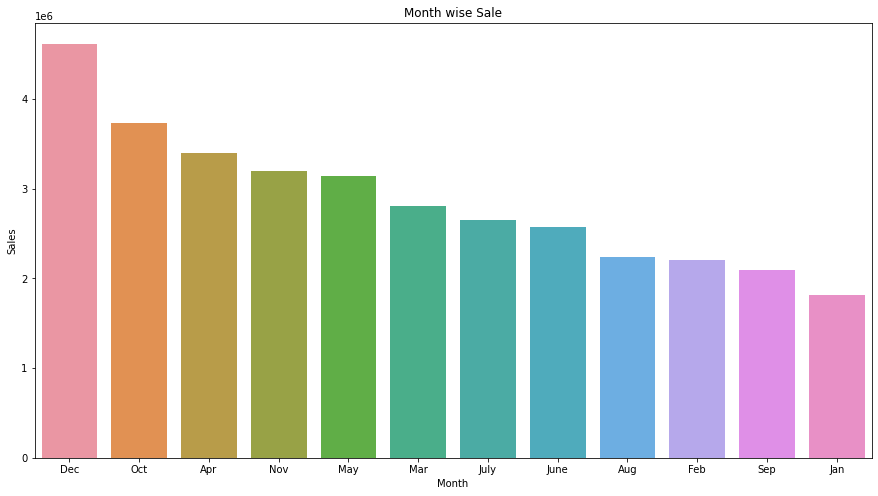

In [12]:
fig = plt.figure(figsize = (15, 8))
Month=["Dec","Oct","Apr","Nov","May","Mar","July","June","Aug",'Feb',"Sep","Jan"] 
DataFrame_sales["Month"]=Month
sns.barplot(x ="Month",y ="Sales",data = DataFrame_sales)
plt.title("Month wise Sale")
plt.show()

## Cities with the most shopping.



> We can add the city column.



In [13]:
DataFrame_city = DataFrame_filtered
City = []
for i in DataFrame_city['Purchase Address']:
    City.append(i.split(",")[1])
DataFrame_city['City'] = City
DataFrame_city

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January,700.00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January,14.95,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January,23.98,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January,149.99,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January,11.99,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December,7.68,Los Angeles
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December,400.00,Seattle
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December,11.99,Dallas




> Let's look at the total sales of cities.



In [14]:
DataFrame_city=DataFrame_filtered.groupby(["City"])['Sales'].sum().sort_values(ascending=False)
DataFrame_city=DataFrame_city.to_frame()
DataFrame_city

,Sales
City,
San Francisco,8.262204e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Boston,3.661642e+06
Atlanta,2.795499e+06
Dallas,2.767975e+06
Seattle,2.747755e+06
Portland,2.320491e+06
Austin,1.819582e+06


We can see that SanFrancisco is the city with the most shoppers.



> Visualization



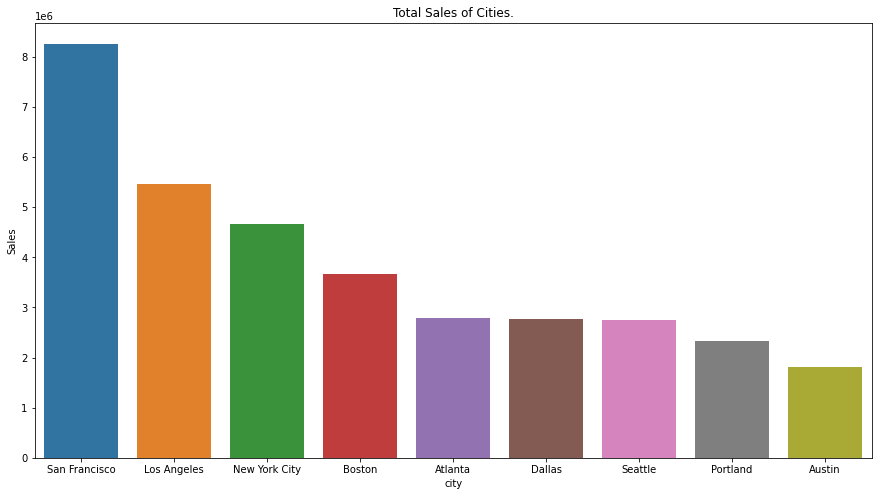

In [15]:
fig = plt.figure(figsize = (15, 8))
city=["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
DataFrame_city["city"]=city
sns.barplot(x = "city" ,y = "Sales",data = DataFrame_city)
plt.title("Total Sales of Cities.")
plt.show()

## The best time zone for advertising.

> We can add the time column.

In [16]:
DataFrame_time = DataFrame_filtered
time = []
for i in DataFrame_time['Order Date']:
    time.append(i.split(" ")[1])
DataFrame_time['Time'] = time
DataFrame_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January,700.00,Boston,21:25
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January,14.95,Portland,14:15
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January,23.98,San Francisco,13:33
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January,149.99,Los Angeles,20:33
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January,11.99,Austin,11:59
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December,14.95,San Francisco,20:58
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December,7.68,Los Angeles,12:01
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December,400.00,Seattle,06:43
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December,11.99,Dallas,10:39




> Let's take a look at the sales by time.



In [17]:
DataFrame_time=DataFrame_filtered.groupby(['Time'])['Sales'].sum().sort_values(ascending=False)
#DataFrame_time=DataFrame_time.to_frame()
DataFrame_time

Time
19:01    54503.14
12:21    54181.96
19:16    54156.39
20:13    53149.51
19:20    52903.41
           ...   
02:50      381.99
03:57      317.63
04:05      277.72
03:59      177.29
04:09      173.52
Name: Sales, Length: 1440, dtype: float64

Best time zone: 18.30-19.30

## Best selling product.



> Sales-Product Columns



In [20]:
DataFrame_product	=DataFrame_filtered.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)
#DataFrame_product=DataFrame_product.to_frame()
DataFrame_product

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity Ordered, dtype: float64

Visualization

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


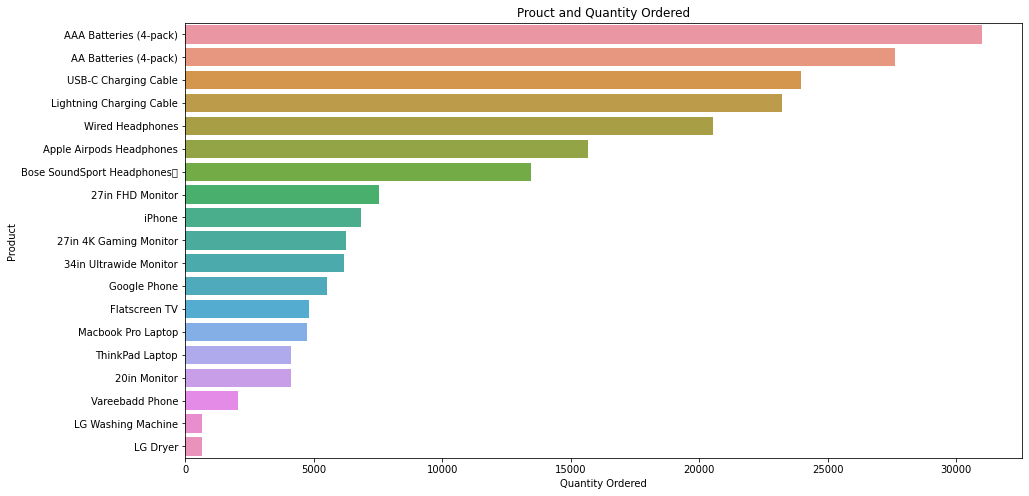

In [19]:
fig = plt.figure(figsize = (15, 8))
product=["AAA Batteries (4-pack)","AA Batteries (4-pack)","USB-C Charging Cable","Lightning Charging Cable","Wired Headphones","Apple Airpods Headphones","Bose SoundSport Headphones	","27in FHD Monitor","iPhone","27in 4K Gaming Monitor","34in Ultrawide Monitor","Google Phone","Flatscreen TV","Macbook Pro Laptop","ThinkPad Laptop","20in Monitor","Vareebadd Phone","LG Washing Machine","LG Dryer"]
DataFrame_product["Product"]=product
sns.barplot(x = "Quantity Ordered",y = "Product",data = DataFrame_product)
plt.title("Prouct and Quantity Ordered")
plt.show()